In [4]:
from model import FOMO
import tensorflow_datasets as tfds
import tensorflow as tf
from dataset import tfDataset

FOMO = FOMO().modelKeras()
BATCH_SIZE = 4
AUTOTUNE = tf.data.experimental.AUTOTUNE

print('imports done!')

2022-12-10 23:35:09.600495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-10 23:35:09.700342: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-10 23:35:10.220016: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-10 23:35:10.220057: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

2022-12-10 23:35:11.164775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 23:35:11.186071: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 23:35:11.186259: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 23:35:11.186635: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

imports done!


In [5]:
FOMO.compile(
    loss=tf.keras.losses.BinaryFocalCrossentropy(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.CosineSimilarity()
    ],
    optimizer='nadam'
)

In [6]:
(train, test, valid), info = tfds.load(
    'tfDataset',
    with_info=True,
    as_supervised=True,
    split=['train', 'test', 'valid'],
    shuffle_files=True)

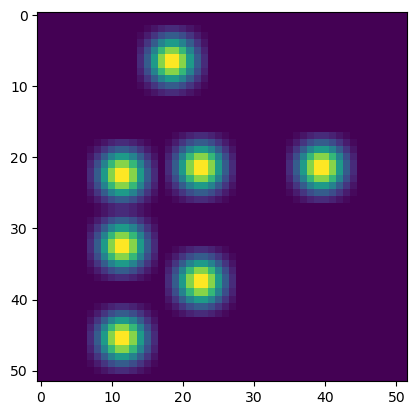

In [39]:
import matplotlib.pyplot as plt
plt.imshow(next(train.as_numpy_iterator())[1][:, :, 0])

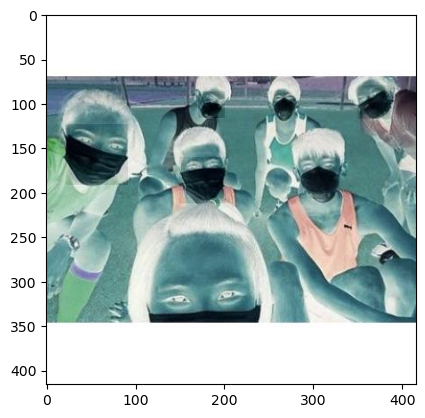

In [37]:
plt.imshow(~next(train.as_numpy_iterator())[0])

In [9]:
def pre_process(image, label):
    return tf.cast(image, tf.float32)/255, label

def data_process(ds, split:str):
    ds = ds.map(pre_process, num_parallel_calls = AUTOTUNE)
    ds = ds.cache()
    ds = ds.shuffle(info.splits[split].num_examples)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(AUTOTUNE)
    return ds

In [10]:
train, test, valid = data_process(train, 'train'), data_process(test, 'test'), data_process(valid, 'valid')

In [357]:
FOMO.fit(
    train, epochs=2, verbose=2
)

'FOMO.fit(\n    train, epochs=2, verbose=2\n)'